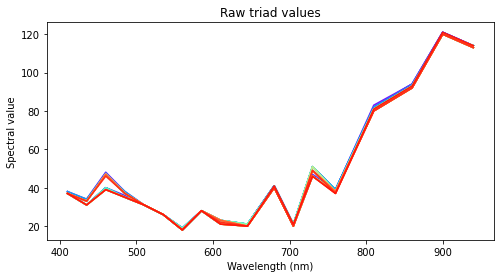

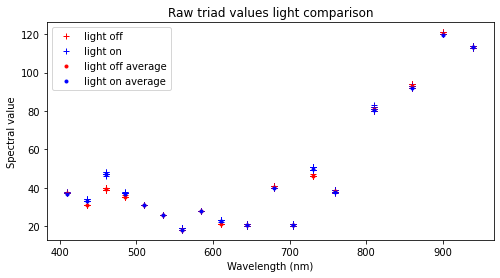

Raw statistics
NDVIB average lights off: 0.31124832716430934
NDVIB average lights on: 0.26228248401168164
EVI average lights off: 1.7569675890271386
EVI average lights on: 2.028271006622384
PSND average lights off: 0.6444057074884748
PSND average lights on: 0.6451780192128845

Normalized statistics
NDVIB average lights off: 0.3112483271643093
NDVIB average lights on: 0.26228248401168164
EVI average lights off: 0.2150843070988045
EVI average lights on: 0.2144730392439452
PSND average lights off: 0.6444057074884748
PSND average lights on: 0.6451780192128845


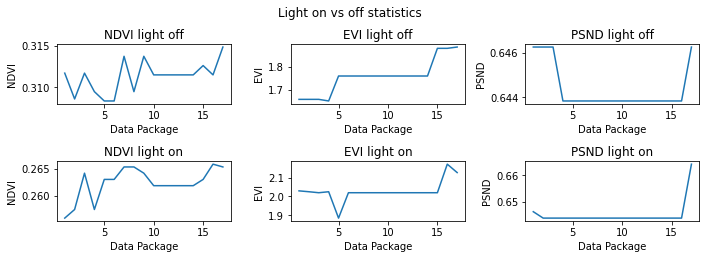

In [8]:

#########################################################################################################
# Name: Data_Processing_With_Light
# Author: Colton
# Description: Import spectral data from excel files (.csv)
# and makes each sample into a NDVI value
# When accessing dataframe, start with an index of 1 for sample_count
# This means, the number of packets + 1 = sample_count 
########################################################################################################

# import plotly.express as px
from matplotlib.backends.backend_pdf import PdfPages
from cycler import cycler
import numpy as np
import pandas as pd
import array
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from operator import truediv
import statistics
from matplotlib.pyplot import cm

########################################################################################################
#import data from desired file

title = "Grass2"
df = pd.read_csv((title+".csv"))

#enter title of pdf here
pdf_title = (title+".pdf")

#enter desired close-ups of columns
close_up_col = [3]  #only works for 1 column for now
########################################################################################################

#data setup starts here
#drop unnecesary columns from dataframe
df = df.drop('ID', 1)
# df = df.drop('Packet Number', 1)
df = df.drop('Unnamed: 1', 1)
df = df.drop('Timestamp', 1)
df = df.drop('Unnamed: 3', 1)
df = df.drop('Packet', 1)
# df = df.drop('SensorData',1)
df = df.drop('EVI',1)
df = df.drop('LightState',1)
# df = df.drop('NDVI',1)
df = df.drop('NDVIB',1)
df = df.drop('PSND',1)
df = df.drop('NDVIB_W',1)
df = df.drop('EVI_W',1)
df = df.drop('PSND_W',1)
df = df.dropna(1) 


#replace wavelength labels
# df = df.replace('410nm', '410')
# df = df.replace('435nm', '435')
# df = df.replace('460nm', '460')
# df = df.replace('485nm', '485')
# df = df.replace('510nm', '510')
# df = df.replace('535nm', '535')
# df = df.replace('560nm', '560')
# df = df.replace('585nm', '585')
# df = df.replace('610nm', '610')
# df = df.replace('645nm', '645')
# df = df.replace('680nm', '680')
# df = df.replace('705nm', '705')
# df = df.replace('730nm', '730')
# df = df.replace('760nm', '760')
# df = df.replace('810nm', '810')
# df = df.replace('860nm', '860')
# df = df.replace('900nm', '900')
# df = df.replace('940nm', '940')
df = df.replace('a', '410')  
df = df.replace('b', '435')
df = df.replace('c', '460')
df = df.replace('d', '485')
df = df.replace('e', '510')
df = df.replace('f', '535')
df = df.replace('g', '560')
df = df.replace('h', '585')
df = df.replace('i', '610')
df = df.replace('j', '645')
df = df.replace('k', '680')
df = df.replace('l', '705')
df = df.replace('r', '730')
df = df.replace('s', '760')
df = df.replace('t', '810')
df = df.replace('u', '860')
df = df.replace('v', '900')
df = df.replace('w', '940')

#makes dataframe into matrix with row 1 being first row with data
np_df = df.to_numpy()

#make values from dataframe type int
df[:] = df[:].astype(int)

#get the number of packets
sample_count = df.shape[0]

#get the numebr of wavelengths
col_count = df.shape[1]

#get rid of unpaired light samples
if(sample_count%2==0):
    df = df.drop(sample_count-1, axis=0)
    sample_count=df.shape[0]
data_print = df.copy()

#create sample count with n packets, not n+1
n_sample_count=(sample_count-1)
    
#get the total spectral values for each packet
Total = df.sum(axis=1)

#create a seperate dataframe for normalized data
norm = df.copy()

#create empty lists for categorized data
NDVIB_on = []
EVI_on = []
NDVIB_off = []
EVI_off = []
PSND_off = []
PSND_on = []
norm_NDVIB_on = []
norm_EVI_on = []
norm_NDVIB_off = []
norm_EVI_off = []
norm_PSND_off = []
norm_PSND_on = []
wanted_col = []

#get the wavelength values for plotting... its 18
wvln = df.loc[0,:]

########################################################################################################

#calculations start here

#organize dataframe into categorized lists for EVI & NDVIB & PSND
for i in range(1, sample_count):
    excel_row = i
    one = df.iloc[excel_row,:] #runs raw calculations
    if (i%2==1):
        NDVIB_off.append(((one[16-1]+one[17-1]+one[18-1]+one[5-1]+one[6-1]+one[7-1])-2*(one[2-1]+one[3-1]+one[4-1]))/((one[16-1]+one[17-1]+one[18-1]+one[5-1]+one[6-1]+one[7-1]+2*(one[2-1]+one[3-1]+one[4-1])))) 
        EVI_off.append((2.5*(one[17-1] - one[14-1]))/(one[17-1] + 6*one[14-1] - 7.5*one[2-1] + 1))
        PSND_off.append((one[17-1]-one[6-1])/(one[17-1]+one[6-1]))
    else:
        NDVIB_on.append(((one[16-1]+one[17-1]+one[18-1]+one[5-1]+one[6-1]+one[7-1])-2*(one[2-1]+one[3-1]+one[4-1]))/((one[16-1]+one[17-1]+one[18-1]+one[5-1]+one[6-1]+one[7-1]+2*(one[2-1]+one[3-1]+one[4-1])))) 
        EVI_on.append((2.5*(one[17-1] - one[14-1]))/(one[17-1] + 6*one[14-1] - 7.5*one[2-1] + 1))
        PSND_on.append((one[17-1]-one[6-1])/(one[17-1]+one[6-1]))
    norm.iloc[excel_row,:] = one/Total[excel_row]
    two = one/Total[excel_row] #runs normalized calculations
    if (i%2==1):
        norm_NDVIB_off.append(((two[16-1]+two[17-1]+two[18-1]+two[5-1]+two[6-1]+two[7-1])-2*(two[2-1]+two[3-1]+two[4-1]))/((two[16-1]+two[17-1]+two[18-1]+two[5-1]+two[6-1]+two[7-1]+2*(two[2-1]+two[3-1]+two[4-1])))) 
        norm_EVI_off.append((2.5*(two[17-1] - two[14-1]))/(two[17-1] + 6*two[14-1] - 7.5*two[2-1] + 1))
        norm_PSND_off.append((two[17-1]-two[6-1])/(two[17-1]+two[6-1]))
    else:
        norm_NDVIB_on.append(((two[16-1]+two[17-1]+two[18-1]+two[5-1]+two[6-1]+two[7-1])-2*(two[2-1]+two[3-1]+two[4-1]))/((two[16-1]+two[17-1]+two[18-1]+two[5-1]+two[6-1]+two[7-1]+2*(two[2-1]+two[3-1]+two[4-1])))) 
        norm_EVI_on.append((2.5*(two[17-1] - two[14-1]))/(two[17-1] + 6*two[14-1] - 7.5*two[2-1] + 1))
        norm_PSND_on.append((two[17-1]-two[6-1])/(two[17-1]+two[6-1]))
        
#makes dat into matrix
np_norm = norm.to_numpy()
np_df = df.to_numpy()

#isolates column that wants to be examined
for i in range(0,len(close_up_col)):
        wanted_col.append(np_df[1:sample_count,int(close_up_col[i]-1)])

#function to output data into organized statistics
def wavelength_averages(matrix, input_data,sample_count):
    list_count = 0
    avg_on = [] 
    avg_off = [] 
    data_on=[]
    data_off=[]
    excel_column_count = 0
    two = 0
    data_off_graphable = []
    data_on_graphable = []
    for j in range(0,18):#controls column
        temp_off=[]
        temp_on=[]
        stack = input_data.iloc[:, j]  #make a list of the whole column
        for i in range(1, sample_count):#controls row
            #seperates light on and off to seperate lists
            if (i%2==1):
                data_off.append(stack[i])
                temp_off.append(stack[i])
            else:
                data_on.append(stack[i])
                temp_on.append(stack[i])
        #inserts columns average value to new list
        avg_off.append(sum(temp_off)/(int((sample_count-1)/2)))
        avg_on.append(sum(temp_on)/(int((sample_count-1)/2)))
        excel_column_count = excel_column_count + 1   
    for i in range(1, sample_count):#controls row
        if (i%2==1):
            data_off_graphable.extend(matrix[i])
        else:
            data_on_graphable.extend(matrix[i])
    return(data_off_graphable,data_on_graphable,avg_off,avg_on)

#calls function above for triad data and normalized data
raw_off,raw_on,raw_avg_off,raw_avg_on = wavelength_averages(np_df,df,sample_count)
#norm_off,norm_on,norm_avg_off,norm_avg_on = wavelength_averages(np_norm,norm,sample_count)


#########################################################################################################
#PLOTS START HERE
#---------------------

#a = np.arange(1,len(NDVI)/2,1)
b = np.arange(1,len(NDVIB_on)+1,1)

#saves plots to pdf
# with PdfPages('multipage_pdf.pdf') as pdf:
with PdfPages(pdf_title) as pdf:

    plt.figure(figsize=(8,4))
    color=iter(cm.rainbow(np.linspace(0,1,n_sample_count)))
    for i in range(1, n_sample_count):
        c=next(color)
        plt.plot(wvln, df.iloc[i,:],c=c)
    plt.title("Raw triad values")
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Spectral value")
    pdf.savefig()
    plt.show()

    plt.figure(figsize=(8,4))
    for i in range(1, (int((sample_count-1)/2))):
        min_r=18*i-18
        max_r=18*i
        if(i==1):    
            plt.plot(wvln, raw_off[min_r:max_r], "+", color="red", label='light off')
            plt.plot(wvln, raw_on[min_r:max_r], "+", color="blue", label='light on')
        else:
            plt.plot(wvln, raw_off[min_r:max_r], "+", color="red")
            plt.plot(wvln, raw_on[min_r:max_r], "+", color="blue")
    plt.plot(wvln, raw_avg_off, ".", color="red", label='light off average')
    plt.plot(wvln, raw_avg_on, ".", color="blue", label='light on average')
    plt.title("Raw triad values light comparison")
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Spectral value")
    plt.legend()
    pdf.savefig()
    plt.show()

    
    #to print specific columns of requested raw data
#     plt.figure(figsize=(8,4))
#     plt.plot(wanted_col,np.linspace(1,sample_count,1))
#     plt.title(close_up_col)
#     plt.xlabel("Value")
#     plt.ylabel("Package")
#     pdf.savefig()
#     plt.show()
    
    
    fig = plt.figure(figsize=(10,5))
    plt.suptitle('Light on vs off statistics')


    fig.add_subplot(331)
    plt.title("NDVI light off")
    plt.xlabel("Data Package")
    plt.ylabel("NDVI")
    plt.plot(b,NDVIB_off)


    fig.add_subplot(332)
    plt.title("EVI light off")
    plt.xlabel("Data Package")
    plt.ylabel("EVI")
    plt.plot(b,EVI_off)

    fig.add_subplot(334)
    plt.title("NDVI light on")
    plt.xlabel("Data Package")
    plt.ylabel("NDVI")
    plt.plot(b,NDVIB_on)

    fig.add_subplot(335)
    plt.title("EVI light on")
    plt.xlabel("Data Package")
    plt.ylabel("EVI")
    plt.plot(b,EVI_on)
    
    fig.add_subplot(333)
    plt.title("PSND light off")
    plt.xlabel("Data Package")
    plt.ylabel("PSND")
    plt.plot(b,PSND_off)
        
    fig.add_subplot(336)
    plt.title("PSND light on")
    plt.xlabel("Data Package")
    plt.ylabel("PSND")
    plt.plot(b,PSND_on)
    

    NDVIB_on_sum = sum(NDVIB_on)/len(NDVIB_on)
    NDVIB_off_sum = sum(NDVIB_off)/len(NDVIB_off)
    EVI_on_sum = sum(EVI_on)/len(EVI_on)
    EVI_off_sum=sum(EVI_off)/len(EVI_off)
    PSND_on_sum=sum(PSND_on)/len(PSND_on)
    PSND_off_sum=sum(PSND_off)/len(PSND_off)
    norm_NDVIB_on_sum = sum(norm_NDVIB_on)/len(norm_NDVIB_on)
    norm_NDVIB_off_sum = sum(norm_NDVIB_off)/len(norm_NDVIB_off)
    norm_EVI_on_sum = sum(norm_EVI_on)/len(norm_EVI_on)
    norm_EVI_off_sum=sum(norm_EVI_off)/len(norm_EVI_off)
    norm_PSND_on_sum=sum(norm_PSND_on)/len(norm_PSND_on)
    norm_PSND_off_sum=sum(norm_PSND_off)/len(norm_PSND_off)

    # for i in range(0,int(len(NDVI_on))):
    #     NDVI_on_sum = NDVI_on_sum + NDVI_on[i]
    #     NDVI_off_sum = NDVI_off_sum + NDVI_off[i]
    #     EVI_on_sum = EVI_on_sum + EVI_on[i]
    #     EVI_off_sum = EVI_off_sum + EVI_off[i]

    print("Raw statistics")
    print("NDVIB average lights off:",NDVIB_off_sum)
    print("NDVIB average lights on:",NDVIB_on_sum)
    print("EVI average lights off:",EVI_off_sum)
    print("EVI average lights on:",EVI_on_sum)
    print("PSND average lights off:",PSND_off_sum)
    print("PSND average lights on:",PSND_on_sum)
    
    print("\nNormalized statistics")
    print("NDVIB average lights off:",norm_NDVIB_off_sum)
    print("NDVIB average lights on:",norm_NDVIB_on_sum)
    print("EVI average lights off:",norm_EVI_off_sum)
    print("EVI average lights on:",norm_EVI_on_sum)
    print("PSND average lights off:",norm_PSND_off_sum)
    print("PSND average lights on:",norm_PSND_on_sum)

#     txt = "Raw statistics/n","NDVI average lights off:",NDVI_off_sum
    

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#     plt.text(0.05,0.95,txt, transform=fig.transFigure, size=24)
    pdf.savefig()
    plt.show()

    #ax3.imshow(img)

        
    
#make average graphs for light on and off for wavelengths, percent absorbed, NDVI, EVI

#effect of light on change of EVI and NDVI

#Standard deviation 

#better plots(types?)

#comment code

#checkout tabs

#liam, pics(2) to pdf and stats to pdf and delta
#colton, more grpahocs wavelength spoecific, and adding control data graph

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
